# 1 Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2 Data
The data is related with the different factors of the crop. The classification goal is
to predict the production of the yield.


In [4]:
crop=pd.read_csv(r"C:\Users\DD\Desktop\yield\yield.csv")    #importing the data

In [5]:
crop

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.0,Albania,Maize,1990.0,36613,1485.0,121.00,NaN
1,1.0,Albania,Potatoes,NaN,NaN,NaN,NaN,16.37
2,2.0,Albania,"Rice, paddy",NaN,NaN,1485.0,121.00,16.37
3,3.0,Albania,Sorghum,1990.0,12500,1485.0,121.00,16.37
4,4.0,Albania,Soybeans,1990.0,7000,1485.0,NaN,16.37
...,...,...,...,...,...,...,...,...
28237,28237.0,Zimbabwe,"Rice, paddy",NaN,NaN,NaN,NaN,NaN
28238,28238.0,Zimbabwe,Sorghum,NaN,NaN,NaN,NaN,NaN
28239,28239.0,Zimbabwe,Soybeans,2013.0,13142,657.0,2550.07,19.76
28240,28240.0,Zimbabwe,Sweet potatoes,2013.0,22222,657.0,2550.07,19.76


# 3 Data Preprocessing

In [4]:
crop.head(3)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.0,Albania,Maize,1990.0,36613,1485.0,121.0,NaN
1,1.0,Albania,Potatoes,NaN,NaN,NaN,NaN,16.37
2,2.0,Albania,"Rice, paddy",NaN,NaN,1485.0,121.0,16.37


In [5]:
crop.tail(3)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28239,28239.0,Zimbabwe,Soybeans,2013.0,13142,657.0,2550.07,19.76
28240,28240.0,Zimbabwe,Sweet potatoes,2013.0,22222,657.0,2550.07,19.76
28241,28241.0,Zimbabwe,Wheat,2013.0,22888,657.0,2550.07,19.76


In [6]:
crop.info

<bound method DataFrame.info of        Unnamed: 0      Area            Item    Year hg/ha_yield  \
0             0.0   Albania           Maize  1990.0       36613   
1             1.0   Albania        Potatoes     NaN         NaN   
2             2.0   Albania     Rice, paddy     NaN         NaN   
3             3.0   Albania         Sorghum  1990.0       12500   
4             4.0   Albania        Soybeans  1990.0        7000   
...           ...       ...             ...     ...         ...   
28237     28237.0  Zimbabwe     Rice, paddy     NaN         NaN   
28238     28238.0  Zimbabwe         Sorghum     NaN         NaN   
28239     28239.0  Zimbabwe        Soybeans  2013.0       13142   
28240     28240.0  Zimbabwe  Sweet potatoes  2013.0       22222   
28241     28241.0  Zimbabwe           Wheat  2013.0       22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00       NaN  
1                          

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28079 non-null  float64
 1   Area                           27359 non-null  object 
 2   Item                           27096 non-null  object 
 3   Year                           26716 non-null  float64
 4   hg/ha_yield                    26285 non-null  object 
 5   average_rain_fall_mm_per_year  25539 non-null  float64
 6   pesticides_tonnes              26287 non-null  float64
 7   avg_temp                       25806 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


In [8]:
crop.shape

(28242, 8)

In [9]:
crop.describe(include='all')

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28079.000000,27359,27096,26716.000000,26285,25539.000000,26287.000000,25806.000000
unique,NaN,101,10,NaN,10489,NaN,NaN,NaN
top,NaN,India,Potatoes,NaN,10000,NaN,NaN,NaN
freq,NaN,4039,4070,NaN,94,NaN,NaN,NaN
mean,14127.489120,NaN,NaN,2001.551243,NaN,1165.771330,36898.949574,20.618850
std,8157.195199,NaN,NaN,7.045317,NaN,712.639125,59355.057490,6.236986
min,0.000000,NaN,NaN,1990.000000,NaN,51.000000,0.040000,1.300000
25%,7051.500000,NaN,NaN,1995.000000,NaN,593.000000,1740.205000,16.800000
50%,14128.000000,NaN,NaN,2001.000000,NaN,1083.000000,17866.000000,21.545000
75%,21200.500000,NaN,NaN,2008.000000,NaN,1668.000000,48687.880000,25.990000


In [10]:
crop.nunique()

Unnamed: 0                       28079
Area                               101
Item                                10
Year                                23
hg/ha_yield                      10489
average_rain_fall_mm_per_year       99
pesticides_tonnes                 1606
avg_temp                          1785
dtype: int64

In [11]:
(crop.isnull().sum()/(len(crop)))*100

Unnamed: 0                       0.577155
Area                             3.126549
Item                             4.057786
Year                             5.403300
hg/ha_yield                      6.929396
average_rain_fall_mm_per_year    9.570852
pesticides_tonnes                6.922314
avg_temp                         8.625451
dtype: float64

In [12]:
crop.isnull().sum()

Unnamed: 0                        163
Area                              883
Item                             1146
Year                             1526
hg/ha_yield                      1957
average_rain_fall_mm_per_year    2703
pesticides_tonnes                1955
avg_temp                         2436
dtype: int64

In [13]:
# Number of years (1990 - 2016)
len(crop.Year.unique())

24

In [14]:
# Number of countries
len(crop.Area.unique())

102

# Heatmap show the missing values in data 

<Axes: >

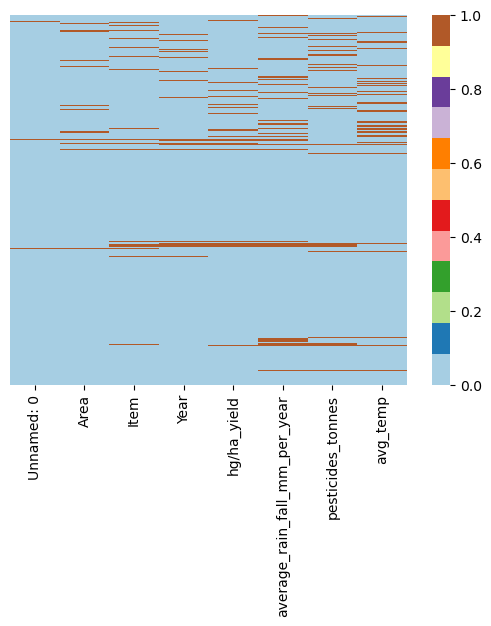

In [15]:
sns.heatmap(crop.isnull(),yticklabels=False,cmap="Paired")

In [16]:
crop['Area'].value_counts()   #returns object containing counts of unique values. 

India         4039
Brazil        2136
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: Area, Length: 101, dtype: int64

In [17]:
crop.rename({"Unnamed: 0":"Number","Item":"Crop Name","hg/ha_yield":"Yield (hg/ha)",
             "average_rain_fall_mm_per_year":"Rainfall (mm)",
             "avg_temp":"Temperature (Celsius)"}, axis=1, inplace=True)

In [18]:
crop

,Number,Area,Crop Name,Year,Yield (hg/ha),Rainfall (mm),pesticides_tonnes,Temperature (Celsius)
0,0.0,Albania,Maize,1990.0,36613,1485.0,121.00,NaN
1,1.0,Albania,Potatoes,NaN,NaN,NaN,NaN,16.37
2,2.0,Albania,"Rice, paddy",NaN,NaN,1485.0,121.00,16.37
3,3.0,Albania,Sorghum,1990.0,12500,1485.0,121.00,16.37
4,4.0,Albania,Soybeans,1990.0,7000,1485.0,NaN,16.37
...,...,...,...,...,...,...,...,...
28237,28237.0,Zimbabwe,"Rice, paddy",NaN,NaN,NaN,NaN,NaN
28238,28238.0,Zimbabwe,Sorghum,NaN,NaN,NaN,NaN,NaN
28239,28239.0,Zimbabwe,Soybeans,2013.0,13142,657.0,2550.07,19.76
28240,28240.0,Zimbabwe,Sweet potatoes,2013.0,22222,657.0,2550.07,19.76


In [19]:
crop.isnull().sum()

Number                    163
Area                      883
Crop Name                1146
Year                     1526
Yield (hg/ha)            1957
Rainfall (mm)            2703
pesticides_tonnes        1955
Temperature (Celsius)    2436
dtype: int64

In [20]:
crop.dropna(subset=["Number"],inplace=True)
crop.dropna(subset=["Area"],inplace=True)
crop["Crop Name"].fillna(crop["Crop Name"].mode()[0],inplace=True)
crop["Temperature (Celsius)"].fillna(crop["Temperature (Celsius)"].median(),inplace=True)
crop["Rainfall (mm)"].fillna(crop["Rainfall (mm)"].median(),inplace=True)
crop["pesticides_tonnes"].fillna(crop["pesticides_tonnes"].median(),inplace=True)
crop["Year"].ffill(axis=0,inplace=True)
crop["Yield (hg/ha)"].ffill(axis=0,inplace=True) 

In [21]:
crop.isnull().sum()

Number                   0
Area                     0
Crop Name                0
Year                     0
Yield (hg/ha)            0
Rainfall (mm)            0
pesticides_tonnes        0
Temperature (Celsius)    0
dtype: int64

# After treatment their is no missing values in data

<Axes: >

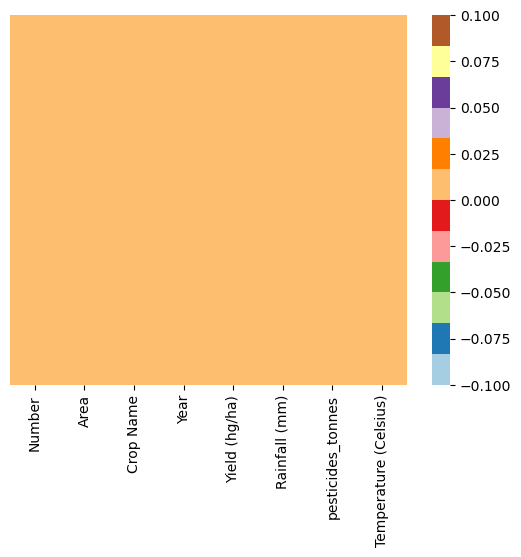

In [22]:
sns.heatmap(crop.isnull(),yticklabels=False,cmap="Paired")

In [23]:
crop.drop(["Number"],axis=1,inplace=True)

In [24]:
crop

,Area,Crop Name,Year,Yield (hg/ha),Rainfall (mm),pesticides_tonnes,Temperature (Celsius)
0,Albania,Maize,1990.0,36613,1485.0,121.00,21.69
1,Albania,Potatoes,1990.0,36613,1083.0,17529.44,16.37
2,Albania,"Rice, paddy",1990.0,36613,1485.0,121.00,16.37
3,Albania,Sorghum,1990.0,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990.0,7000,1485.0,17529.44,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013.0,165714,1083.0,17529.44,21.69
28238,Zimbabwe,Sorghum,2013.0,165714,1083.0,17529.44,21.69
28239,Zimbabwe,Soybeans,2013.0,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013.0,22222,657.0,2550.07,19.76


In [25]:
cat_data=crop.select_dtypes(include=object)     # show catogorical data column
num_data=crop.select_dtypes(exclude=object)     # show numerical data in column

In [26]:
cat_data

,Area,Crop Name,Yield (hg/ha)
0,Albania,Maize,36613
1,Albania,Potatoes,36613
2,Albania,"Rice, paddy",36613
3,Albania,Sorghum,12500
4,Albania,Soybeans,7000
...,...,...,...
28237,Zimbabwe,"Rice, paddy",165714
28238,Zimbabwe,Sorghum,165714
28239,Zimbabwe,Soybeans,13142
28240,Zimbabwe,Sweet potatoes,22222


In [27]:
num_data

,Year,Rainfall (mm),pesticides_tonnes,Temperature (Celsius)
0,1990.0,1485.0,121.00,21.69
1,1990.0,1083.0,17529.44,16.37
2,1990.0,1485.0,121.00,16.37
3,1990.0,1485.0,121.00,16.37
4,1990.0,1485.0,17529.44,16.37
...,...,...,...,...
28237,2013.0,1083.0,17529.44,21.69
28238,2013.0,1083.0,17529.44,21.69
28239,2013.0,657.0,2550.07,19.76
28240,2013.0,657.0,2550.07,19.76


# 4 Exploratory Data Analysis (EDA)

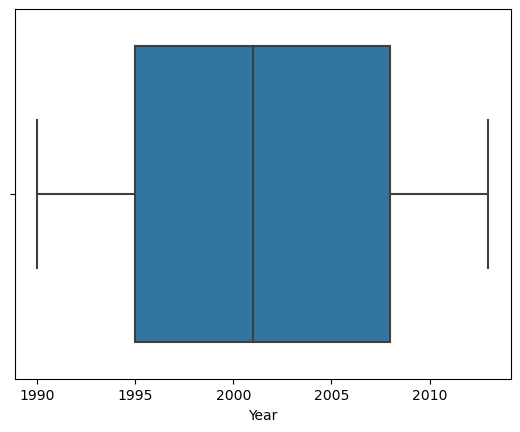

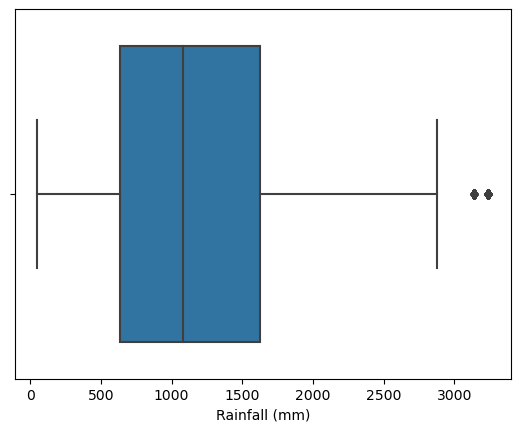

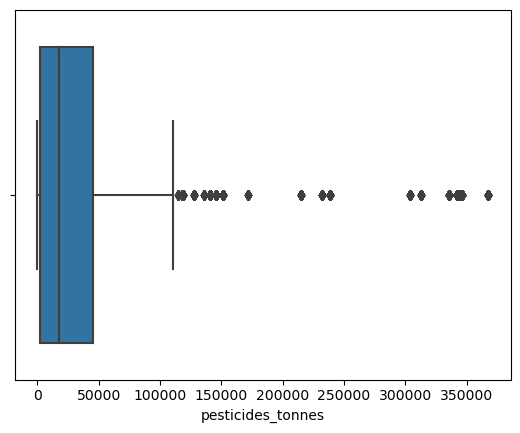

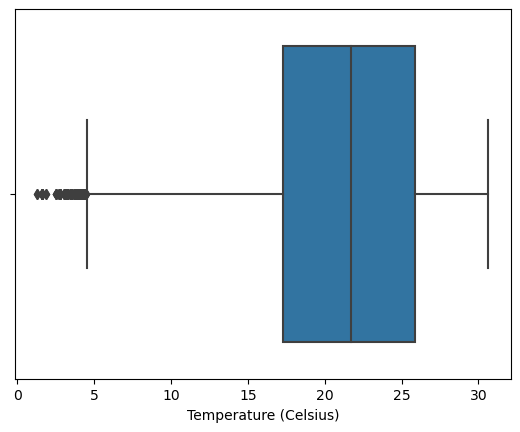

In [28]:
for i in num_data.columns:
    sns.boxplot(x=crop[i])   #Boxplot show Numeric data
    plt.show()

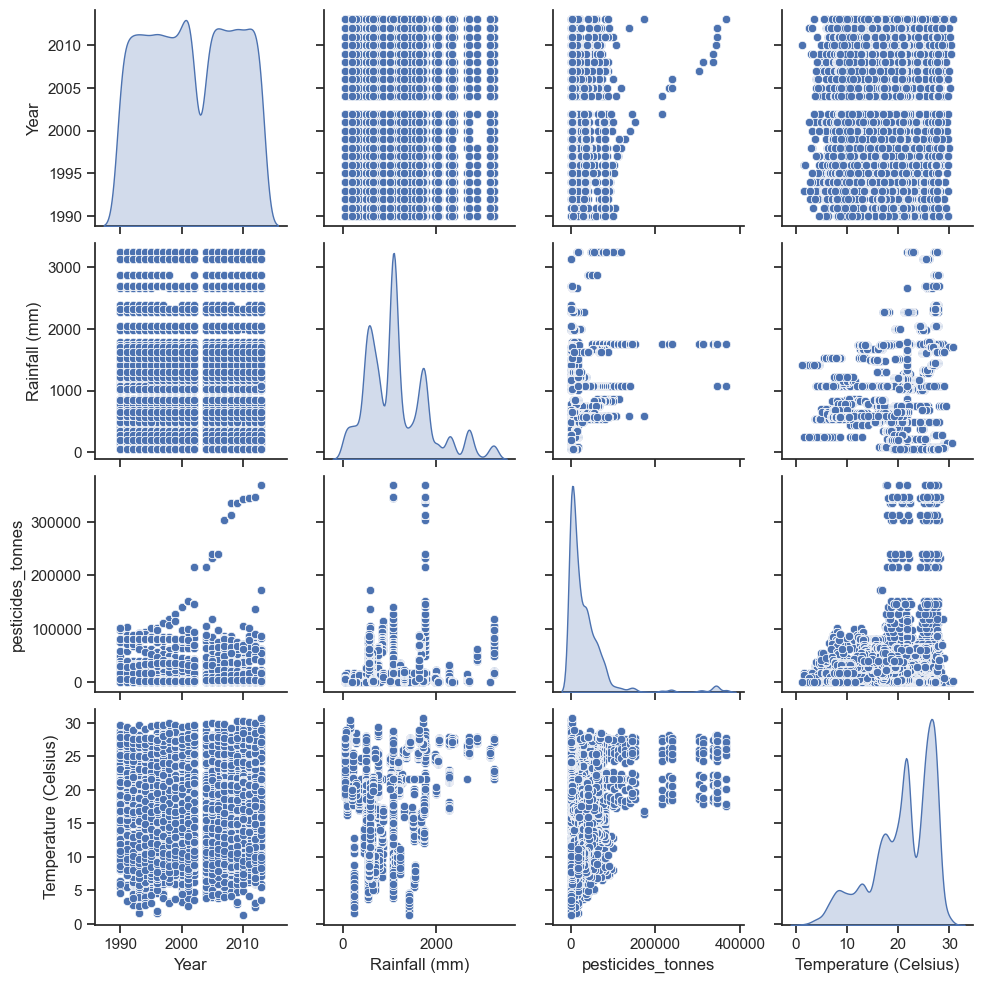

In [29]:
sns.set(style="ticks")
sns.pairplot(crop, diag_kind="kde", markers="o")
plt.show()

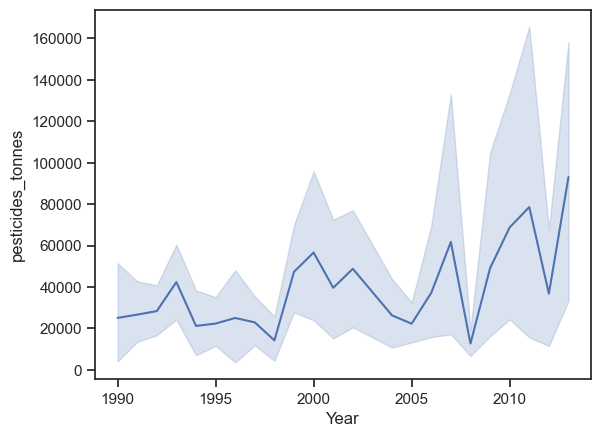

In [30]:
a=crop.sample(250)
sns.lineplot(x="Year",y="pesticides_tonnes",data=a)
plt.show()

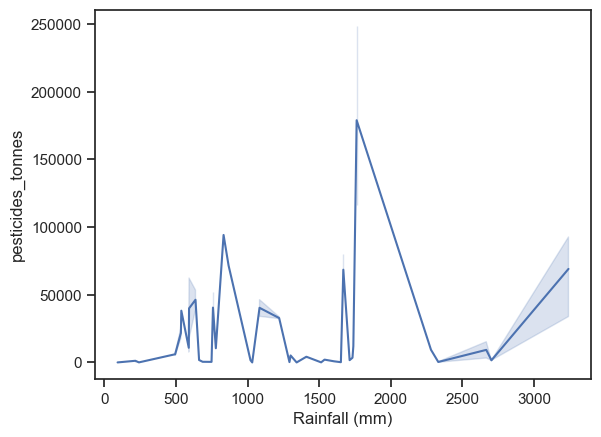

In [31]:
a=crop.sample(105)
sns.lineplot(x="Rainfall (mm)",y="pesticides_tonnes",data=a)
plt.show()

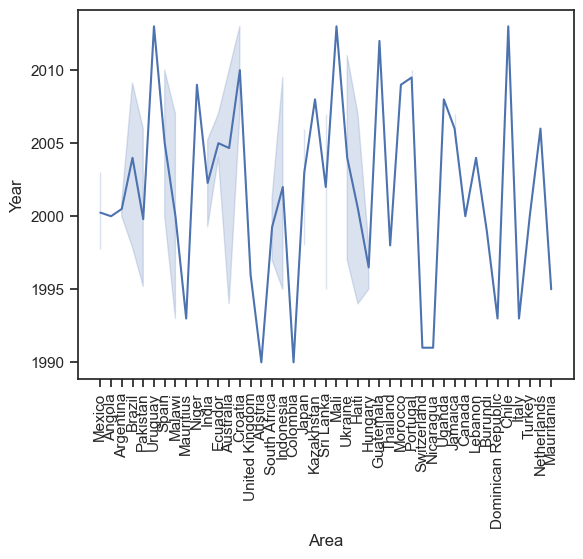

In [32]:
a=crop.sample(99)
figsize=(22,10)
sns.lineplot(x="Area",y="Year",data=a)
plt.xticks(rotation=90)
plt.show()

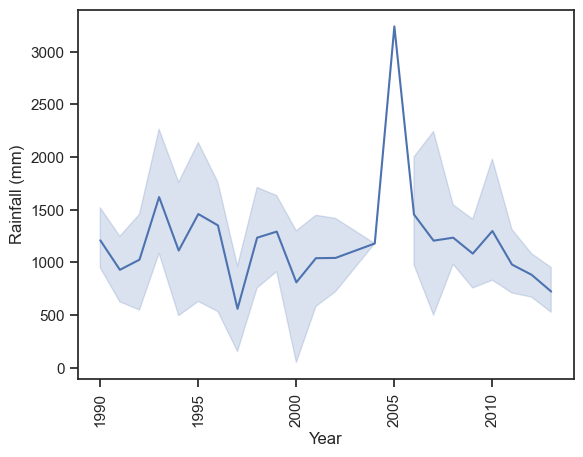

In [33]:
a=crop.sample(99)
figsize=(22,10)
sns.lineplot(x="Year",y="Rainfall (mm)",data=a)
plt.xticks(rotation=90)
plt.show()

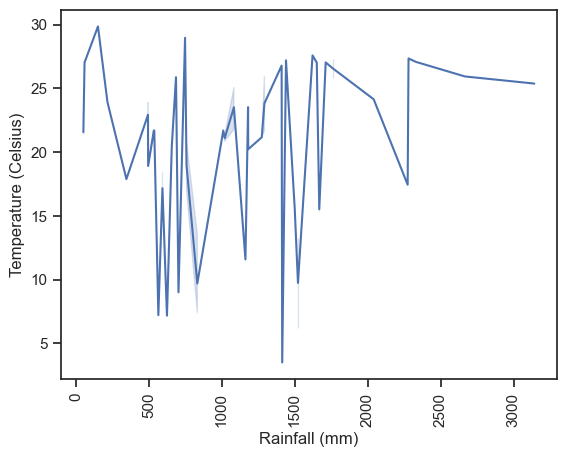

In [34]:
a=crop.sample(99)
figsize=(50,30)
sns.lineplot(x="Rainfall (mm)",y="Temperature (Celsius)",data=a)
plt.xticks(rotation=90)
plt.show()

<Axes: >

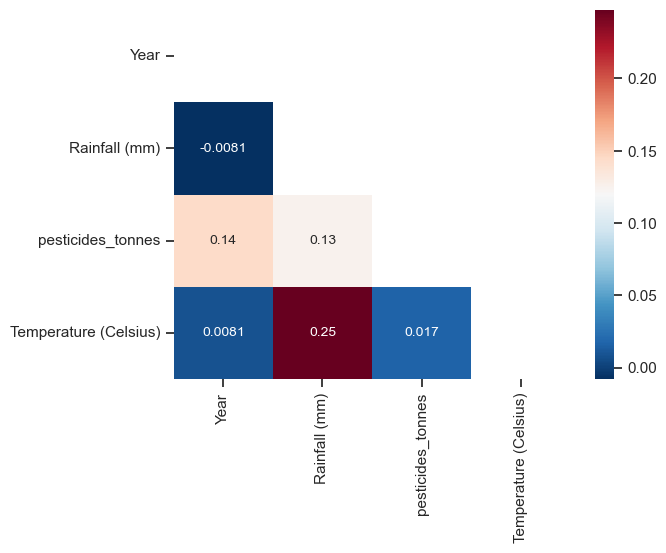

In [35]:
corr=num_data.corr()
msk = np.triu(np.ones_like(corr))
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10},mask=msk)

<Axes: xlabel='Year', ylabel='Count'>

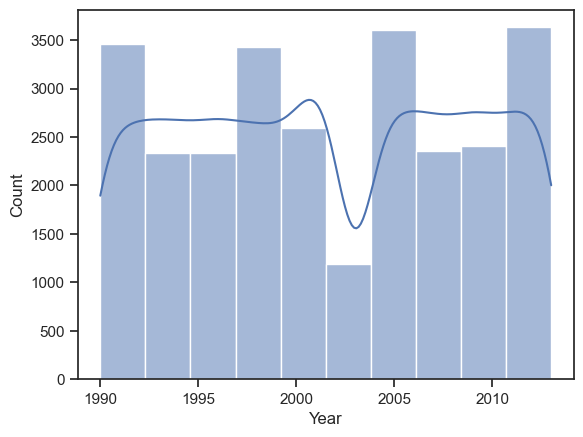

In [36]:
sns.histplot(crop["Year"],bins=10,kde=True)

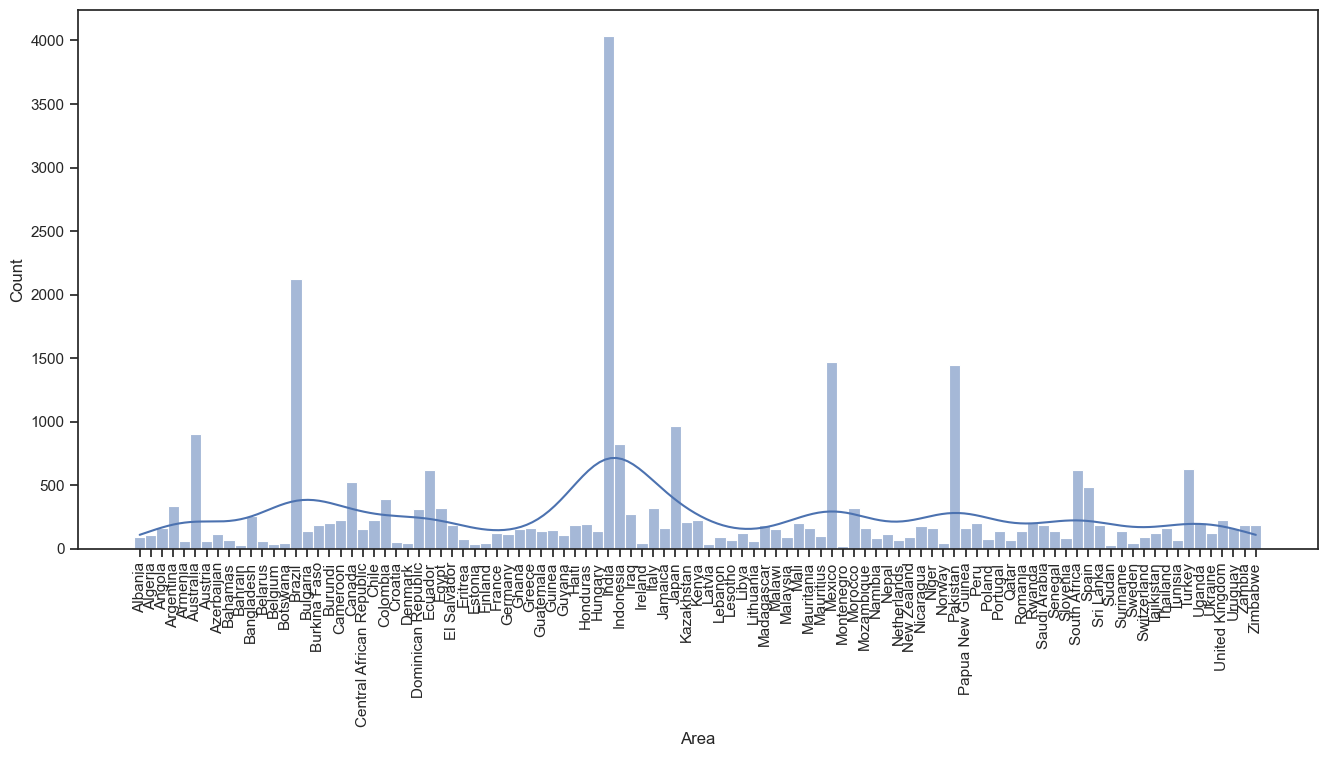

In [37]:
plt.figure(figsize=(16,7))
sns.histplot(crop["Area"],bins=10,kde=True)
plt.xticks(rotation=90)
plt.show()

In [38]:
b=crop.groupby("Crop Name")["Crop Name"].count()

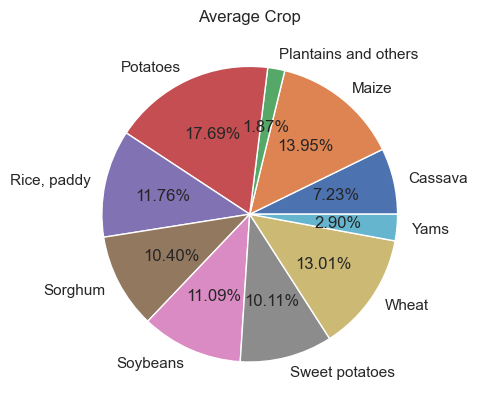

In [39]:
plt.pie(b,labels=b.index,autopct="%.2f%%")
plt.xticks(rotation=90)
plt.title("Average Crop")
plt.show()

In [42]:
b=crop.groupby("Year")["Year"].count()

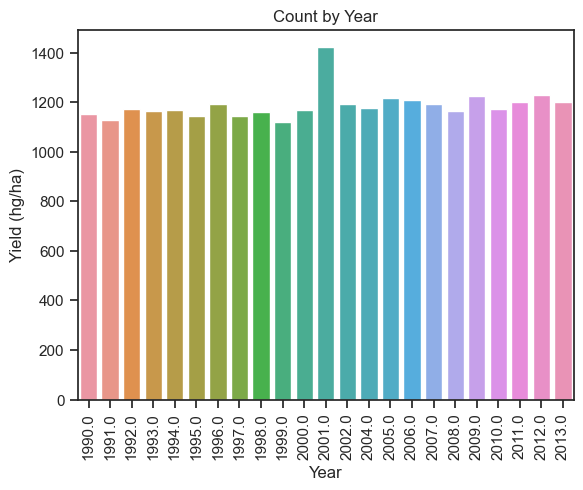

In [43]:
sns.barplot(x=b.index,y=b.values)
plt.xticks(rotation=90)
plt.title("Count by Year")
plt.xlabel("Year")
plt.ylabel("Yield (hg/ha)")
plt.show()

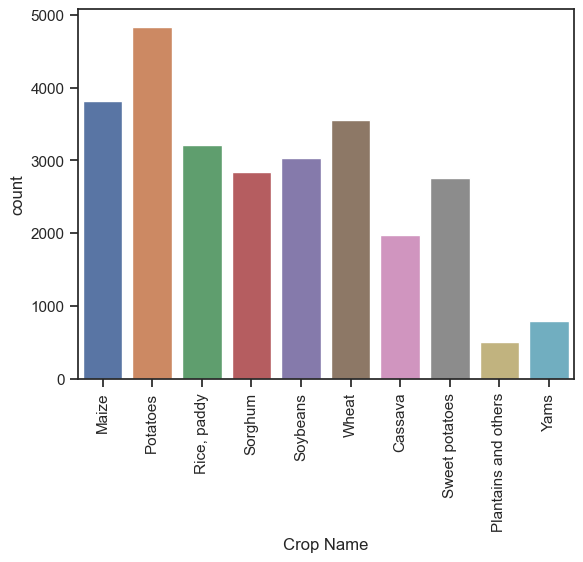

In [44]:
sns.countplot(x='Crop Name',data=crop)
plt.xticks(rotation=90)
plt.show()

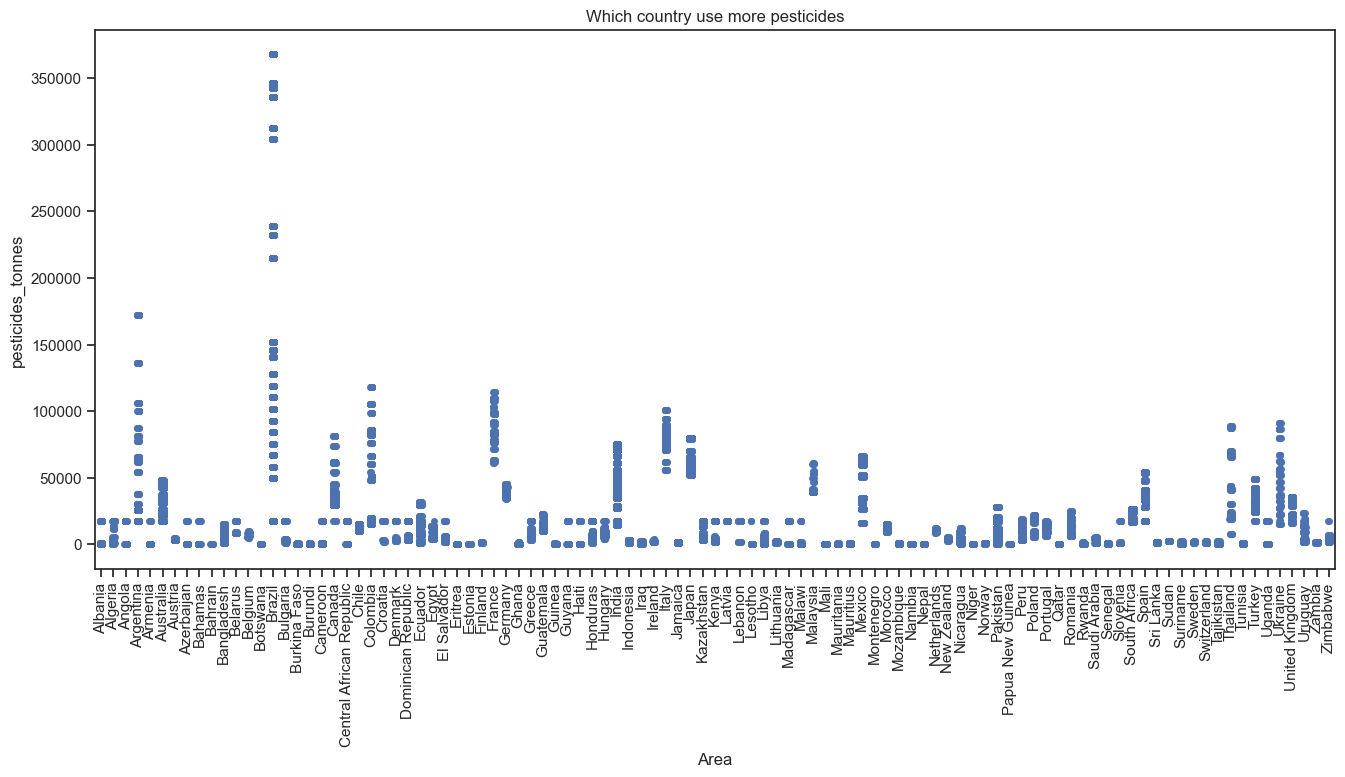

In [45]:
plt.figure(figsize=(16,7))
sns.stripplot(x="Area",y="pesticides_tonnes",data=crop)
plt.title("Which country use more pesticides")
plt.xticks(rotation=90)
plt.show()

C:\Users\DD\AppData\Local\Temp\ipykernel_6992\362564267.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crop.loc[crop['Area'] == 'Germany'].groupby('Year').mean().plot()


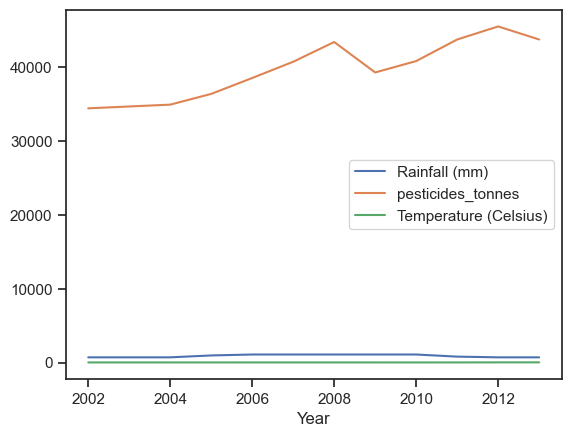

In [46]:
crop.loc[crop['Area'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

Text(0.5, 1.0, 'Box Plot of Preis')

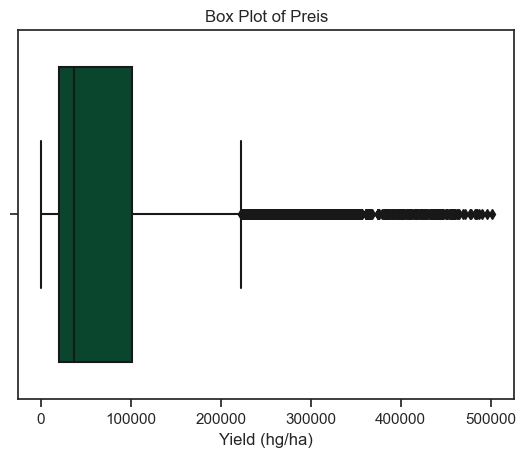

In [113]:
sns.boxplot(x=df_new['Yield (hg/ha)'],color='#005030')
plt.title(f'Box Plot of Preis')

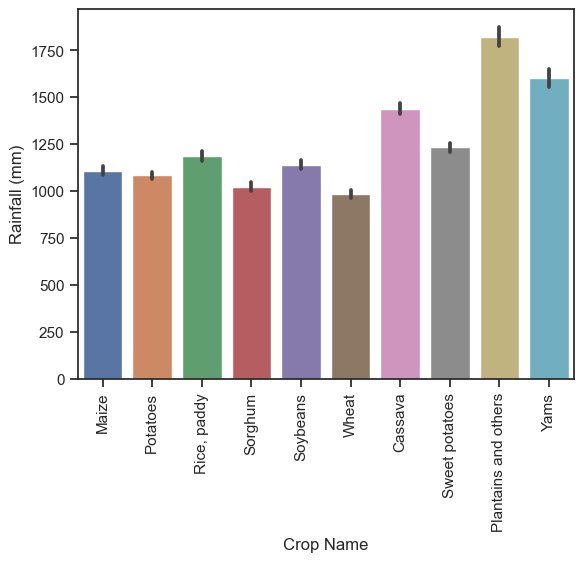

In [120]:
sns.barplot(x='Crop Name', y='Rainfall (mm)', data=crop, orient='v')
plt.xticks(rotation=90)
plt.show()

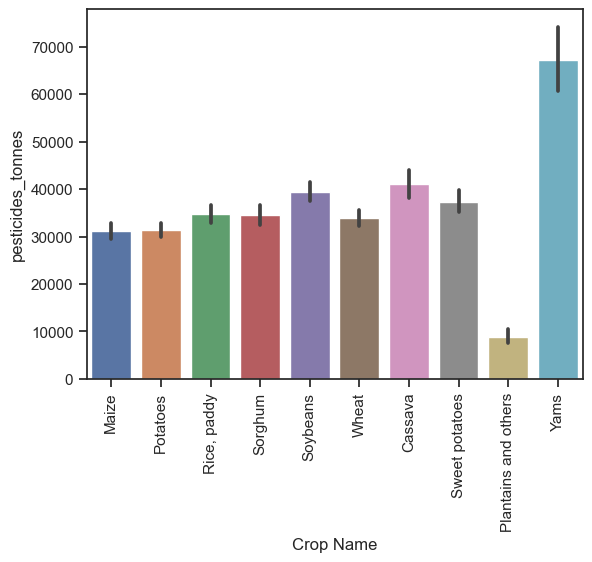

In [121]:
sns.barplot(x='Crop Name', y='pesticides_tonnes', data=crop, orient='v')
plt.xticks(rotation=90)
plt.show()

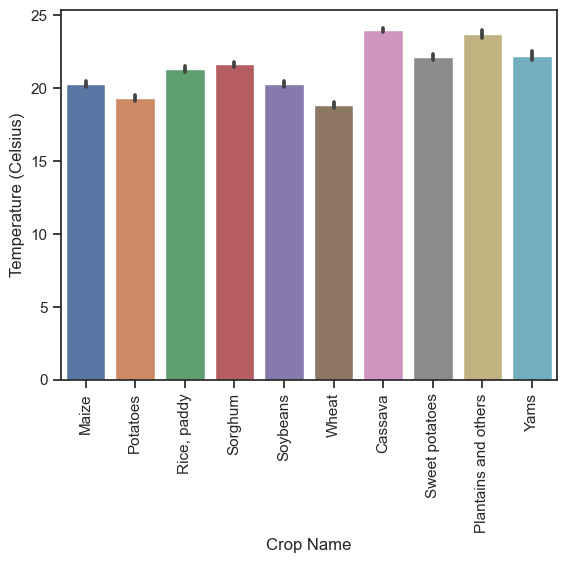

In [122]:
sns.barplot(x='Crop Name', y='Temperature (Celsius)', data=crop, orient='v')
plt.xticks(rotation=90)
plt.show()

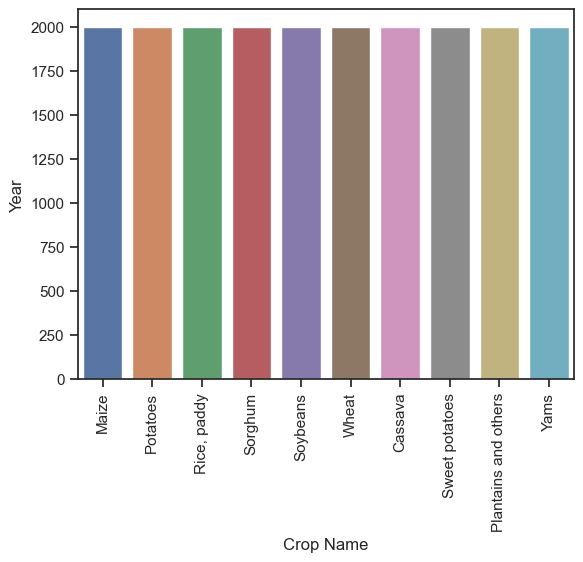

In [123]:
sns.barplot(x='Crop Name', y='Year', data=crop, orient='v')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution Plot of Preis')

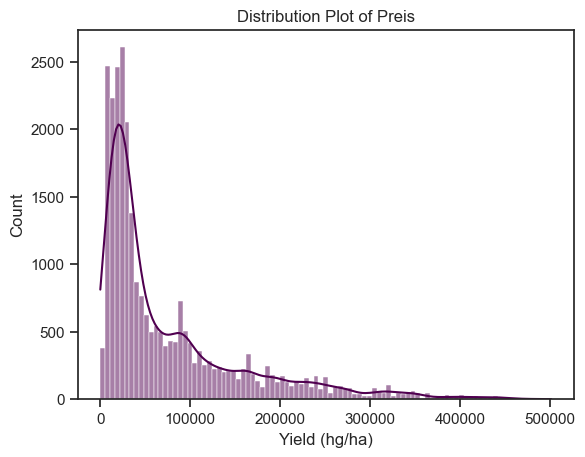

In [114]:
sns.histplot(x=df_new['Yield (hg/ha)'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Preis')

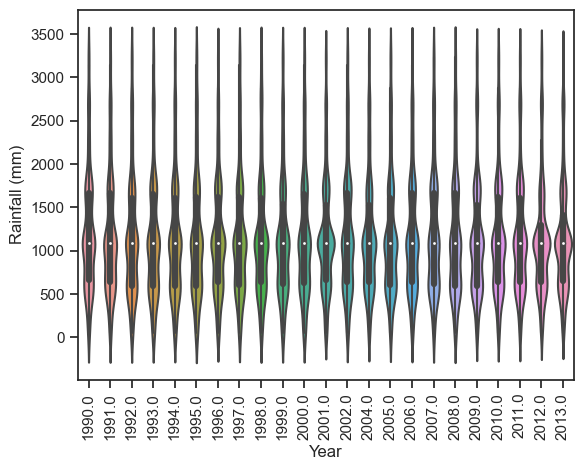

In [47]:
sns.violinplot(x="Year",y="Rainfall (mm)",data=crop)
plt.xticks(rotation=90)
plt.show()

# 5 Outlier detection and removal

In [53]:
new_df

,Area,Crop Name,Year,Yield (hg/ha),Rainfall (mm),pesticides_tonnes,Temperature (Celsius)
0,Albania,Maize,1990.0,36613,1485.0,121.00,21.69
1,Albania,Potatoes,1990.0,36613,1083.0,17529.44,16.37
2,Albania,"Rice, paddy",1990.0,36613,1485.0,121.00,16.37
3,Albania,Sorghum,1990.0,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990.0,7000,1485.0,17529.44,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013.0,165714,1083.0,17529.44,21.69
28238,Zimbabwe,Sorghum,2013.0,165714,1083.0,17529.44,21.69
28239,Zimbabwe,Soybeans,2013.0,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013.0,22222,657.0,2550.07,19.76


In [54]:
z_scores=stats.zscore(new_df["Temperature (Celsius)"])
z_score_outlier=(z_scores<-3)|(z_scores>3)

In [55]:
z_score_outlier_row=new_df[z_score_outlier]
print("outliers detected by Z-score:",z_score_outlier_row)

outliers detected by Z-score:              Area    Crop Name    Year Yield (hg/ha)  Rainfall (mm)  \
17150  Kazakhstan        Maize  1992.0         31214          250.0   
17152  Kazakhstan     Potatoes  1992.0        105923          250.0   
17154  Kazakhstan  Rice, paddy  1992.0         39915          250.0   
17156  Kazakhstan      Sorghum  1992.0         11765          250.0   
17158  Kazakhstan     Soybeans  1992.0         11919          250.0   
17160  Kazakhstan        Wheat  1992.0         13324          250.0   
17162  Kazakhstan        Maize  1993.0         32677          250.0   
17164  Kazakhstan     Potatoes  1993.0         96200          250.0   
17166  Kazakhstan  Rice, paddy  1993.0         36871          250.0   
17168  Kazakhstan      Sorghum  1993.0         12500          250.0   
17170  Kazakhstan     Soybeans  1993.0         11269          250.0   
17172  Kazakhstan        Wheat  1993.0          9178          250.0   
17198  Kazakhstan        Maize  1996.0         

In [56]:
p=(z_scores>-3)&(z_scores<3)
df_new=new_df[p]

In [57]:
df_new

,Area,Crop Name,Year,Yield (hg/ha),Rainfall (mm),pesticides_tonnes,Temperature (Celsius)
0,Albania,Maize,1990.0,36613,1485.0,121.00,21.69
1,Albania,Potatoes,1990.0,36613,1083.0,17529.44,16.37
2,Albania,"Rice, paddy",1990.0,36613,1485.0,121.00,16.37
3,Albania,Sorghum,1990.0,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990.0,7000,1485.0,17529.44,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013.0,165714,1083.0,17529.44,21.69
28238,Zimbabwe,Sorghum,2013.0,165714,1083.0,17529.44,21.69
28239,Zimbabwe,Soybeans,2013.0,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013.0,22222,657.0,2550.07,19.76


# Linear Regression

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler 
from sklearn.compose import ColumnTransformer
import joblib

In [59]:
categorical_cols=['Crop Name']
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(df_new[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))
numerical_cols=['Year','Temperature (Celsius)','Rainfall (mm)','pesticides_tonnes']
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(df_new[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [60]:
encoder_cols

,Crop Name_Maize,Crop Name_Plantains and others,Crop Name_Potatoes,"Crop Name_Rice, paddy",Crop Name_Sorghum,Crop Name_Soybeans,Crop Name_Sweet potatoes,Crop Name_Wheat,Crop Name_Yams
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
26909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26910,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26911,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26912,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
scaled_cols

,Year,Temperature (Celsius),Rainfall (mm),pesticides_tonnes
0,-1.642466,0.158301,0.563857,-0.609567
1,-1.642466,-0.739669,-0.068228,-0.305626
2,-1.642466,-0.739669,0.563857,-0.609567
3,-1.642466,-0.739669,0.563857,-0.609567
4,-1.642466,-0.739669,0.563857,-0.305626
...,...,...,...,...
26909,1.624805,0.158301,-0.068228,-0.305626
26910,1.624805,0.158301,-0.068228,-0.305626
26911,1.624805,-0.167466,-0.738050,-0.567156
26912,1.624805,-0.167466,-0.738050,-0.567156


In [80]:
Y=df_new['Yield (hg/ha)'] = pd.to_numeric(df_new['Yield (hg/ha)'], errors='coerce')

C:\Users\DD\AppData\Local\Temp\ipykernel_6992\1488642903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y=df_new['Yield (hg/ha)'] = pd.to_numeric(df_new['Yield (hg/ha)'], errors='coerce')


In [81]:
Y.isnull().sum()

0

In [63]:
X=pd.concat([encoder_cols,scaled_cols],axis=1)

In [64]:
X

,Crop Name_Maize,Crop Name_Plantains and others,Crop Name_Potatoes,"Crop Name_Rice, paddy",Crop Name_Sorghum,Crop Name_Soybeans,Crop Name_Sweet potatoes,Crop Name_Wheat,Crop Name_Yams,Year,Temperature (Celsius),Rainfall (mm),pesticides_tonnes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.642466,0.158301,0.563857,-0.609567
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.642466,-0.739669,-0.068228,-0.305626
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.642466,-0.739669,0.563857,-0.609567
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.642466,-0.739669,0.563857,-0.609567
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.642466,-0.739669,0.563857,-0.305626
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.624805,0.158301,-0.068228,-0.305626
26910,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.624805,0.158301,-0.068228,-0.305626
26911,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.624805,-0.167466,-0.738050,-0.567156
26912,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.624805,-0.167466,-0.738050,-0.567156


In [82]:
Y

0         36613.0
1         36613.0
2         36613.0
3         12500.0
4          7000.0
           ...   
28237    165714.0
28238    165714.0
28239     13142.0
28240     22222.0
28241     22888.0
Name: Yield (hg/ha), Length: 26914, dtype: float64

In [83]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [84]:
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [85]:
print(model.intercept_) #y-intercept of the model

156851.2271362113


In [86]:
print(model.coef_)

[-121538.88647677  -42346.96499459   13155.10385344 -113686.42327323
 -136539.98901586 -141092.94767476  -37676.58155463 -129555.73508792
  -44732.47751622    8054.82380194  -11850.92087513   -1870.24920727
    4421.3268142 ]


In [87]:
mae = mean_absolute_error(Y_test,y_pred)
mse= mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 35547.97408069165
Mean Squared Error 3206317258.1390595
Root Mean Absolute Error 56624.35216529245
R2 Score 0.5294891887453548


In [93]:
#adjusted_r2=1-[(1-r2)*(n-1)/(n-k-1)]
adjusted_r2=1-((1-0.52948)*(10169-1)/(10169-13-1))
print('adjusted r2 is :',adjusted_r2)

adjusted r2 is : 0.5288776602658789


In [89]:
y_mean=np.mean(Y_test)
SSR = np.sum((y_pred - y_mean) ** 2)
SSR

20685991271390.867

In [90]:
SST = np.sum((Y_test - y_mean) ** 2)
SST

36682697586775.5

In [91]:
SSE=SST-SSR
SSE

15996706315384.633

In [92]:
b=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})
b

,Actual,Predicted
16402,323558.0,176208.541345
12133,175712.0,159766.670615
8677,97147.0,161492.604764
18737,5856.0,-2383.350356
3713,19488.0,33362.476789
...,...,...
25276,70170.0,2861.511256
5155,57576.0,105.566153
12927,88588.0,111160.234690
17013,27612.0,46429.186531


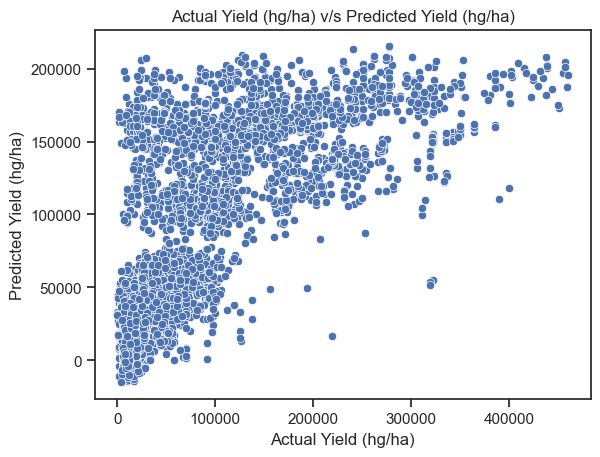

In [95]:
sns.scatterplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual Yield (hg/ha) v/s Predicted Yield (hg/ha)')
plt.show()

# import some libraries cross val score, GridSearchCV, Ridge, Lasso 

In [97]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge,Lasso

In [98]:
lr_model=LinearRegression()
lr_scores=cross_val_score(lr_model,X_train,Y_train,cv=5)


In [99]:
lasso_model=Lasso(alpha=1.0)
lassso_scores=cross_val_score(lasso_model,X_train,Y_train,cv=5)

In [100]:
ridge_model=Ridge(alpha=1.0)
ridge_scores=cross_val_score(ridge_model,X_train,Y_train,cv=5)

In [101]:
lr_model.fit(X_train,Y_train)
lr_prediction =lr_model.predict(X_test)
lr_mae =mean_absolute_error(Y_test,lr_prediction)
lr_mse =mean_squared_error(Y_test,lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(Y_test,lr_prediction)

In [102]:
print('Linear mae',lr_mae)
print('Linear mse',lr_mse)
print('Linear rmse',lr_rmse)
print('Linear r2',lr_r2)

Linear mae 35547.97408069165
Linear mse 3206317258.1390595
Linear rmse 56624.35216529245
Linear r2 0.5294891887453548


# L1(Lasso)

In [103]:
lasso_model.fit(X_train,Y_train)
lasso_prediction =lasso_model.predict(X_test)
lasso_mae =mean_absolute_error(Y_test,lasso_prediction)
lasso_mse =mean_squared_error(Y_test,lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(Y_test,lr_prediction)

In [104]:
print("LASSO MAE=",lasso_mae)
print("LASSO MSE=",lasso_mse)
print("LASSO R2=",lasso_r2)

LASSO MAE= 35546.35588145759
LASSO MSE= 3206405016.1985655
LASSO R2= 0.5294891887453548


# L2 (Ridge)

In [105]:
ridge_model.fit(X_train,Y_train)
ridge_prediction =ridge_model.predict(X_test)
ridge_mae =mean_absolute_error(Y_test,ridge_prediction)
ridge_mse =mean_squared_error(Y_test,ridge_prediction)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_test,ridge_prediction)


In [106]:
print('ridge mae',ridge_mae)
print('ridge mse',ridge_mse)
print('ridge rmse',ridge_rmse)
print('ridge r2',ridge_r2)

ridge mae 35538.53022624312
ridge mse 3206764831.5847526
ridge rmse 56628.3041560027
ridge r2 0.5294235096100495


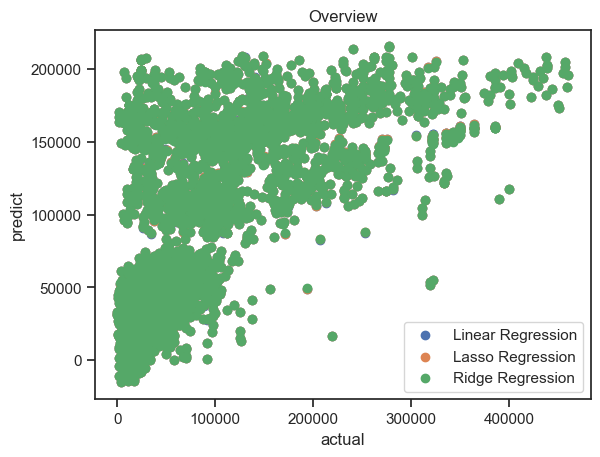

In [107]:
plt.scatter(Y_test,lr_prediction,alpha=1.0,label='Linear Regression')
plt.scatter(Y_test,lasso_prediction,alpha=1.0,label='Lasso Regression')
plt.scatter(Y_test,ridge_prediction,alpha=1.0,label='Ridge Regression')
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('Overview')
plt.legend()

# Robust Techniques

# Huber Regression

In [108]:
# MM estimator:huberregression
from sklearn.linear_model import HuberRegressor
X_scaled = scaler.fit_transform(X_test)
huber = HuberRegressor(epsilon=1.35)
huber.fit(X_scaled, Y_test)
huber_prediction = huber.predict(X_scaled)
huber_mae =mean_absolute_error(Y_test,huber_prediction)
huber_mse =mean_squared_error(Y_test,huber_prediction)
huber_rmse = np.sqrt(huber_mse)
huber_r2 = r2_score(Y_test,huber_prediction)
print('huber mae:',huber_mae)
print('huber mse:',huber_mse)
print('huber rmse:',huber_rmse)
print('huber r2:',huber_r2)

huber mae: 33451.99171642028
huber mse: 3346774072.1736135
huber rmse: 57851.310029882756
huber r2: 0.5088778629790464


# RANSAC regression

In [109]:
# MM estimate: RANSAC regression
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
ransac = RANSACRegressor()
mm= ransac.fit(X_test, Y_test)
mm_estimate_coeff = ransac.estimator_.coef_
mm_estimate_intercept = ransac.estimator_.intercept_
mm_prediction = ransac.predict(X_test)
print("MM Estimate Coefficients:", mm_estimate_coeff)
print("MM Estimate Intercept:", mm_estimate_intercept)
mm_mae =mean_absolute_error(Y_test,mm_prediction)
mm_mse =mean_squared_error(Y_test,mm_prediction)
mm_rmse = np.sqrt(mm_mse)
mm_r2 = r2_score(Y_test,huber_prediction)
print('mm mae:',mm_mae)
print('mm mse:',mm_mse)
print('mm rmse:',mm_rmse)
print('mm r2:',mm_r2)

MM Estimate Coefficients: [-9.97334772e+04 -6.55673669e+03  6.29931872e+03 -9.25340752e+04
 -1.11540580e+05 -1.10192131e+05  1.18199138e+05 -1.03320208e+05
 -9.72602008e+01  1.14568157e+03 -2.66245230e+03 -1.36837117e+03
  2.83075773e+03]
MM Estimate Intercept: 125463.67892256746
mm mae: 43403.221712379804
mm mse: 5231053852.033473
mm rmse: 72326.0247216275
mm r2: 0.5088778629790464


# lTS estimate

In [110]:
# lts estimate
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

ransac.fit(X_test, Y_test)

lts_estimate_coeff = ransac.estimator_.coef_
lts_estimate_intercept = ransac.estimator_.intercept_

print("LTS Estimate Coefficients:", lts_estimate_coeff)
print("LTS Estimate Intercept:", lts_estimate_intercept)

lts_prediction = ransac.predict(X_test)
lts_mae =mean_absolute_error(Y_test,lts_prediction)
lts_mse =mean_squared_error(Y_test,lts_prediction)
lts_rmse = np.sqrt(lts_mse)
lts_r2 = r2_score(Y_test,huber_prediction)
print('lts mae:',lts_mae)
print('lts mse:',lts_mse)
print('lts rmse:',lts_rmse)
print('lts r2:',lts_r2)


LTS Estimate Coefficients: [-17289.44040168   4620.84160864 -18293.88393828  -6283.85399667
 -26229.75251551 -24974.10657743  47670.97992475 -13454.68735647
  39921.20926608    531.24113705  -1189.69880663   2622.32053759
   2381.95719322]
LTS Estimate Intercept: 39535.4441124448
lts mae: 49299.86008848798
lts mse: 8156187058.658424
lts rmse: 90311.61087400903
lts r2: 0.5088778629790464


# theil sen regressor

In [111]:
# theil sen regressor
from sklearn.linear_model import TheilSenRegressor

# Create a Theil-Sen estimator model
theil_sen = TheilSenRegressor()

# Fit the model to the data
theil_sen.fit(X_test, Y_test)

# Get the Theil-Sen estimate of the coefficients
theil_sen_estimate_intercept = theil_sen.intercept_
theil_sen_estimate_coefficient = theil_sen.coef_[0]
print("Theil-Sen Estimate Intercept:", theil_sen_estimate_intercept)
print("Theil-Sen Estimate Coefficient:", theil_sen_estimate_coefficient)

ts_prediction = theil_sen.predict(X_test)
ts_mae =mean_absolute_error(Y_test,ts_prediction)
ts_mse =mean_squared_error(Y_test,ts_prediction)
ts_rmse = np.sqrt(ts_mse)
ts_r2 = r2_score(Y_test,ts_prediction)
print('ts mae:',ts_mae)
print('ts mse:',ts_mse)
print('ts rmse:',ts_rmse)
print('ts r2:',ts_r2)

Theil-Sen Estimate Intercept: 97994.38002196976
Theil-Sen Estimate Coefficient: -52795.71671417082
ts mae: 39738.459992126
ts mse: 3735502536.107464
ts rmse: 61118.75764532083
ts r2: 0.45183393057996646


# One Hot Encoding

In [132]:
crop.shape


(27339, 7)

In [133]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(crop, columns=['Area', 'Crop Name'], prefix=['Area', 'Crop Name'])
crop = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
crop['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [134]:
crop.shape

(27339, 116)